# Mnist Dataset of Handwritten images 

# 1. Importing libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
df = fetch_openml('mnist_784')

In [3]:
X = df.data
y = df.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y = y.astype('int32')

In [7]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [8]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


## 2.  Splitting dataset into train and test set 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [10]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (49000, 784)
Shape of y_train: (49000,)
Shape of X_test: (21000, 784)
Shape of y_test: (21000,)


## Review first data

In [11]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## The pixel intensity is in between 0 to 255 : here we have 70,000 images of 784 dimension so we need to flatten them by reshaping into 28 * 28 dimensions 

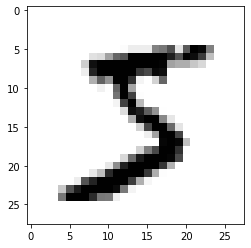

In [12]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img,'binary')

### Making Function 

In [13]:
def print_image(index):
    some_digit = X[index]
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

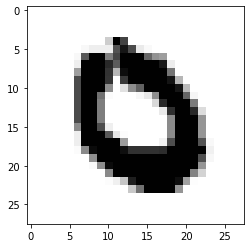

In [14]:
print_image(65987)

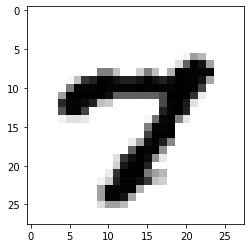

In [15]:
print_image(34647)

## Checking first 25 images ( Batch of Examples)

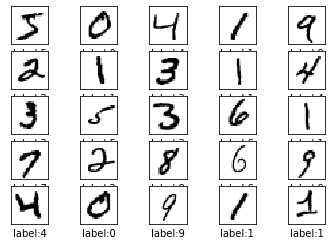

In [16]:
X_plot = X.reshape(70000,28,28)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_plot[i], 'binary')
    plt.xlabel('label:{}'.format(y[i]))
plt.show()    

In [17]:
X_plot.shape

(70000, 28, 28)

# 3. Appyling LogisticRegression 

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [19]:
logreg = logreg.fit(X_train,y_train) 

F:\CONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Predicting Values

In [20]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [21]:
y_pred_train

array([0, 4, 4, ..., 1, 0, 0])

In [22]:
y_pred_test

array([8, 4, 5, ..., 2, 4, 3])

### Accuracy Score on Whole DataSet (r2 value)

In [23]:
logreg.score(X,y)

0.9313857142857143

###  Accuracy Score on Training Dataset (r2 value)

In [24]:
logreg.score(X_train, y_train)

0.9364081632653061

###  Accuracy Score on Test Dataset (r2 value)

In [25]:
logreg.score(X_test, y_test)

0.9196666666666666

## Metrics Performance 

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cmlogreg = confusion_matrix(y_test, y_pred_test)

In [28]:
cmlogreg

array([[1972,    1,    7,    3,    9,   22,   18,    9,   15,    2],
       [   0, 2306,    8,   12,    4,    8,    1,    3,   18,    4],
       [   9,   26, 1912,   31,   19,   10,   34,   25,   52,   15],
       [  11,   10,   51, 1953,    1,   59,    7,   18,   40,   26],
       [   5,    5,    9,    4, 1805,    7,   17,    6,   13,   65],
       [  14,   13,    8,   81,   16, 1652,   35,    8,   71,   17],
       [  12,    4,   28,    3,   24,   19, 1991,    2,    5,    0],
       [   7,    5,   39,    7,   17,    7,    0, 2103,    5,   58],
       [  15,   34,   23,   54,   11,   56,   17,   11, 1739,   32],
       [  15,   14,    6,   22,   53,   10,    1,   64,   25, 1880]],
      dtype=int64)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

### Applying Precision , Recall, f1 on micro 

In [30]:
p = precision_score(y_test, y_pred_test, average='micro')
r = recall_score(y_test, y_pred_test, average='micro') 
f = f1_score(y_test, y_pred_test, average='micro')
print(p, r, f)

0.9196666666666666 0.9196666666666666 0.9196666666666666


### Applying Precision , Recall, f1 on macro 

In [31]:
p1 = precision_score(y_test, y_pred_test, average='macro')
r1 = recall_score(y_test, y_pred_test, average='macro') 
f1 = f1_score(y_test, y_pred_test, average='macro')
print(p1, r1, f1)

0.918612787148788 0.9184139289537377 0.9184558337348481


# Applying Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()

In [33]:
dtf = dtf.fit(X_train,y_train) 

### Predicting Values

In [34]:
y_pred_test_dtf = dtf.predict(X_test)
y_pred_train_dtf = dtf.predict(X_train)

In [35]:
y_pred_test_dtf

array([8, 4, 6, ..., 2, 4, 5])

In [36]:
y_pred_train_dtf

array([0, 4, 4, ..., 1, 0, 0])

### Accuracy Score on Whole Dataset (r2 value)

In [37]:
dtf.score(X, y)

0.9607714285714286

### Accuracy Score on Train Dataset (r2 value)

In [38]:
dtf.score(X_train, y_train)

1.0

### Accuracy Score on Test Dataset (r2 value)

In [39]:
dtf.score(X_test, y_test)

0.8692380952380953

## Metrics Performance 

In [40]:
confusion_matrix(y_test, y_pred_test_dtf)

array([[1886,    3,   32,   11,   10,   48,   34,    7,   16,   11],
       [   2, 2274,   18,   15,    9,    8,    7,    8,   17,    6],
       [  36,   26, 1807,   35,   27,   22,   39,   43,   70,   28],
       [  19,   17,   49, 1825,   11,  109,   14,   35,   53,   44],
       [  13,   16,   24,   13, 1673,   13,   24,   32,   27,  101],
       [  38,   18,   17,   92,   30, 1563,   54,   14,   50,   39],
       [  19,   13,   25,   13,   40,   47, 1881,    2,   32,   16],
       [   6,   22,   44,   19,   28,   10,    5, 2032,   23,   59],
       [  28,   24,   70,   78,   41,   60,   43,   16, 1573,   59],
       [  16,   19,   17,   33,  105,   51,    7,   47,   55, 1740]],
      dtype=int64)

### Applying Precision , Recall, f1 on micro 

In [41]:
p2 = precision_score(y_test, y_pred_test_dtf, average='micro')
r2 = recall_score(y_test, y_pred_test_dtf, average='micro') 
f2 = f1_score(y_test, y_pred_test_dtf, average='micro')
print(p2, r2, f2)

0.8692380952380953 0.8692380952380953 0.8692380952380953


### Applying Precision , Recall, f1 on macro 

In [42]:
p3 = precision_score(y_test, y_pred_test_dtf, average='macro')
r3 = recall_score(y_test, y_pred_test_dtf, average='macro') 
f3 = f1_score(y_test, y_pred_test_dtf, average='macro')
print(p3, r3, f3)

0.867007990093471 0.8671523180145512 0.8670051988217213


# Applying Navive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [44]:
nb = nb.fit(X_train, y_train)

### Predicting Values

In [45]:
y_prednb_test = nb.predict(X_test)
y_prednb_train = nb.predict(X_train)

In [46]:
y_prednb_test

array([8, 9, 9, ..., 6, 9, 3])

In [47]:
y_prednb_train

array([0, 4, 9, ..., 1, 0, 0])

### Accuracy Score on Whole Dataset (r2 value)

In [48]:
nb.score(X, y)

0.5513285714285714

### Accuracy Score on Train Dataset (r2 value)

In [49]:
nb.score(X_train, y_train)

0.5514897959183673

### Accuracy Score on Test Dataset (r2 value)

In [50]:
nb.score(X_test, y_test)

0.550952380952381

## Metrics Performance

In [51]:
confusion_matrix(y_test, y_prednb_test)

array([[1885,    3,   12,    7,    5,    5,   76,    2,   39,   24],
       [   2, 2249,    4,    9,    1,    6,   28,    1,   51,   13],
       [ 252,   60,  652,  131,    5,    9,  560,    3,  433,   28],
       [ 253,  119,   18,  734,    2,    7,  155,   15,  621,  252],
       [  93,   14,   24,   10,  257,   10,  240,   15,  362,  911],
       [ 342,   60,   12,   34,    5,   71,  130,    4, 1055,  202],
       [  26,   36,   11,    0,    2,    6, 1979,    0,   25,    3],
       [  16,   19,    5,   28,   13,    4,    3,  646,   65, 1449],
       [  54,  270,    8,   16,    4,   11,   59,    6, 1125,  439],
       [  16,   20,   11,    5,    5,    1,    1,   25,   34, 1972]],
      dtype=int64)

## Applying Precision , Recall, f1 on micro

In [52]:
pr = precision_score(y_test, y_prednb_test, average='micro')
re = recall_score(y_test, y_prednb_test, average='micro') 
fscore = f1_score(y_test, y_prednb_test, average='micro')
print(pr, re, fscore)

0.550952380952381 0.550952380952381 0.550952380952381


## Applying Precision , Recall, f1 on macro

In [53]:
pr1 = precision_score(y_test, y_prednb_test, average='macro')
re1 = recall_score(y_test, y_prednb_test, average='macro') 
fscore1 = f1_score(y_test, y_prednb_test, average='macro')
print(pr1, re1, fscore1)

0.6632394347461984 0.5423567220243926 0.49356609367046983


# Conclusion : 
<hr>


# Logistic model is able to predict given  hand-written digits  images .
<hr>

## The model will be able to distinguish between images with a very highest accuracy over other Algorithms (Decision Tree ,  Naive Bayes)